In [1]:
import json
import os
from library_dicom.dicom_processor.model.Series import Series 
from library_dicom.dicom_processor.model.SeriesPT import SeriesPT
from library_dicom.dicom_processor.model.SeriesCT import SeriesCT
from library_dicom.dicom_processor.model.csv_reader.MaskBuilder import MaskBuilder

from library_dicom.dicom_processor.tools.folders import *

from library_dicom.dicom_processor.tools.create_mip import *
from library_dicom.dicom_processor.tools.threshold_mask import *

import numpy as np
import SimpleITK as sitk

In [2]:
#LIST FROM PARSE_FILTERED_DICOM_DATASET

In [2]:
nifti_directory = '/media/salim/DD 2To/AHL2011_NIFTI'

csv_directory = '/media/salim/DD 2To/AHL2011_CSV_DATA/AHL2011-CSV'

In [4]:
json_path = '/media/salim/DD 2To/AHL2011_NIFTI/AHL2011_list_path_csv.json'

In [8]:
data = []
with open(json_path) as json_file : 
    reader = json.load(json_file)
    for info in reader :
        for path in reader[info] :
            data.append(path)

In [9]:
dataset = []
for i in range(0,len(data),5):
    subliste = []
    subliste.append(data[i])
    subliste.append(data[i+1])
    subliste.append(data[i+2])
    subliste.append(data[i+3])
    subliste.append(data[i+4])
    dataset.append(subliste)

In [10]:
print(len(dataset))


617


In [ ]:
#GENERE LA LISTE DES JSON AVEC UN UNCONSTANT SPACING, SAVE IT AS JSON 

In [ ]:

from library_dicom.dicom_processor.tools.folders import *
liste_unconstant_z_spacing = []
for liste in dataset : 
    print(dataset.index(liste))
    for i in range(0,4,2) : 
        serie_objet = Series(liste[i])
        serie_objet.get_numpy_array()
        if serie_objet.get_z_spacing() == 'Unconstant Spacing' : 
            print(liste)
            liste_unconstant_z_spacing.append(liste)
            list_z_spacing = serie_objet.calculate_z_spacing()
            print(list_z_spacing)
            #liste_unconstant_z_spacing.append(list_z_spacing)


#save it as json

write_json_file('/media/salim/DD 2To/AHL2011_NIFTI', 'AHL2011_problem_unconstant_spacing', liste_unconstant_z_spacing)

In [ ]:
from library_dicom.dicom_processor.tools.folders import *
write_json_file('/media/salim/DD 2To/AHL2011_NIFTI', 'AHL2011_problem_unconstant_spacing', liste_unconstant_z_spacing)

In [ ]:
#On enleve les series avec un unconstant spacing 
for serie in liste_unconstant_z_spacing : 
    dataset.remove(serie)

In [ ]:
#SAVE AS JSON THE FINAL LIST WITHOUT UNCONSTANT SPACING ERROR

In [ ]:
from library_dicom.dicom_processor.tools.folders import *
write_json_file('/media/salim/DD 2To/AHL2011_NIFTI', 'AHL2011_final_list_dataset', dataset)


In [ ]:
print(len(dataset)) #589


In [30]:
#RECHARGEZ LE JSON AVEC LES SERIES 
json_path = '/media/salim/DD 2To/AHL2011_NIFTI/AHL2011_final_list_dataset.json'
dataset = []
with open(json_path) as json_file : 
    reader = json.load(json_file)
    for info in reader :
        dataset.append(info)

print(len(dataset))

589


In [ ]:
#IF MASK IS CORRECT => GENERATE NIFTI 
#IF PHILIPS, OR MASK FALSE => PUT SERIE IN A NEW LISTE 

In [ ]:
untreated_liste = []
#CT et PT pas dans le même ordre suivant les séries 
#voir pour les ranger avant PT en premier puis CT 
#On traite meme les philips
#On met les erreurs de coté
#si erreur sur les ellipse on tolere
#si erreur polygone alors faut checker



#error = []


for serie in dataset : 
    try : 
        print(serie)
        print(dataset.index(serie))
        if serie[1] == 'PT' : 
            serie_pt_objet = SeriesPT(serie[0])
            manufacturer = serie_pt_objet.get_series_details()['series']['Manufacturer'] 
            if 'philips' in manufacturer.lower() :
                untreated_liste.append(serie)
            else : 
                nifti_array = serie_pt_objet.get_numpy_array()
                study_uid = serie_pt_objet.get_series_details()['study']['StudyInstanceUID']
                size_matrix = serie_pt_objet.get_size_matrix()
                mask_objet = MaskBuilder(os.path.join(csv_directory, serie[4]), size_matrix)
                mask_4D = mask_objet.mask_array
                if mask_objet.is_correct_suv(nifti_array) == True : #si mask correct 
                    print("MASK CORRECT")
                    #generation nifti PT
                    filename_pt = study_uid+'_'+'nifti_'+'PT'+'.nii'
                    serie_pt_objet.export_nifti(os.path.join(nifti_directory, filename_pt))
                    print("EXPORT NIFTI PT")
                    #generation nifti CT
                    serie_ct_objet = SeriesCT(serie[2])
                    serie_ct_objet.get_numpy_array()
                    filename_ct = study_uid+'_'+'nifti_'+'CT'+'.nii'
                    serie_ct_objet.export_nifti(os.path.join(nifti_directory, filename_ct))
                    print("EXPORT NIFTI CT")
                    #generation nifti mask
                    filename_mask = study_uid+'_'+'nifti_'+'mask'+'.nii'
                    serie_pt_objet.export_nifti(os.path.join(nifti_directory, filename_mask), mask_4D)
                    print("EXPORT NIFTI MASK")
                else : 
                    untreated_liste.append(serie)
        else : 
            serie_pt_objet = SeriesPT(serie[2])
            manufacturer = serie_pt_objet.get_series_details()['series']['Manufacturer'] 
            if 'philips' in manufacturer.lower() :
                untreated_liste.append(serie)
            else : 
                nifti_array = serie_pt_objet.get_numpy_array()
                study_uid = serie_pt_objet.get_series_details()['study']['StudyInstanceUID']
                size_matrix = serie_pt_objet.get_size_matrix()
                mask_objet = MaskBuilder(os.path.join(csv_directory, serie[4]), size_matrix)
                mask_4D = mask_objet.mask_array
                if mask_objet.is_correct_suv(nifti_array) == True : #si mask correct 
                    print("MASK CORRECT")
                    #generation nifti PT
                    filename_pt = study_uid+'_'+'nifti_'+'PT'+'.nii'
                    serie_pt_objet.export_nifti(os.path.join(nifti_directory, filename_pt))
                    print("EXPORT NIFTI PT")
                     #generation nifti CT
                    serie_ct_objet = SeriesCT(serie[0])
                    serie_ct_objet.get_numpy_array()
                    filename_ct = study_uid+'_'+'nifti_'+'CT'+'.nii'
                    serie_ct_objet.export_nifti(os.path.join(nifti_directory, filename_ct))
                    print("EXPORT NIFTI CT")
                    #generation nifti mask
                    filename_mask = study_uid+'_'+'nifti_'+'mask'+'.nii'
                    serie_pt_objet.export_nifti(os.path.join(nifti_directory, filename_mask), mask_4D)
                    print("EXPORT NIFTI MASK")
                else : 
                    untreated_liste.append(serie)
                   


    except Exception as err : 
        print(err)
        #error.append(serie)

        


In [ ]:
len(untreated_liste) #392 

In [ ]:
#SAVE THE SERIE WITH FALSE MASK 
#SAVE THE SERIE WITH ERROR
from library_dicom.dicom_processor.tools.folders import *
write_json_file('/media/salim/DD 2To/AHL2011_NIFTI', 'AHL2011_serie_with_false_mask', untreated_liste)
print(len(untreated_liste))

In [ ]:
#IMPORT SERIES WITH FALSE MASK,
#CHECK FLIP AXE Z + SMALL ERROR ON ELLIPSE 

In [13]:
#importer la liste untreated_serie pour la suite : 
json_path = '/media/salim/DD 2To/AHL2011_NIFTI/AHL2011_serie_with_false_mask.json'
untreated_liste = []
with open(json_path) as json_file : 
    reader = json.load(json_file)
    for info in reader :
        untreated_liste.append(info)

print(len(untreated_liste)) #392

392


In [14]:
#SEPARE LES SERIES PHILIPS DES AUTRES SERIES UNTREATED
philips_serie = []
untreated_liste_2 = []
for serie in untreated_liste : 
    #print(untreated_liste.index(serie))
    try : 
        if serie[1] == 'PT' : 
            serie_pt_objet = SeriesPT(serie[0]) 
            manufacturer = serie_pt_objet.get_series_details()['series']['Manufacturer'] 
            #si philips on retraitera plus tard 
            if 'philips' in manufacturer.lower() :
                philips_serie.append(serie)
            else : untreated_liste_2.append(serie)

        else : 
            serie_pt_objet = SeriesPT(serie[2]) 
            manufacturer = serie_pt_objet.get_series_details()['series']['Manufacturer'] 
            #si philips on retraitera plus tard 
            if 'philips' in manufacturer.lower() :
                philips_serie.append(serie)
            else : untreated_liste_2.append(serie)

    except Exception as err : 
        print(serie)
        print(err)


print(len(philips_serie))
write_json_file('/media/salim/DD 2To/AHL2011_NIFTI', 'AHL2011_untreated_philips_serie', philips_serie)
print(len(untreated_liste_2))
write_json_file('/media/salim/DD 2To/AHL2011_NIFTI', 'AHL2011_untreated_serie', untreated_liste_2)

203
189


In [3]:
#IMPORT JSON (serie with false mask, except Philips)
json_path = '/media/salim/DD 2To/AHL2011_NIFTI/AHL2011_untreated_serie.json'
untreated_liste_2 = []
with open(json_path) as json_file : 
    reader = json.load(json_file)
    for info in reader :
        untreated_liste_2.append(info)

print(len(untreated_liste_2)) #189

189


In [4]:
#SUR LES LISTES NON PHILIPS, ON REGARDE
#SI ERREUR SUR SUV MAX MEAN SD SEULEMENT SUR DES ELLIPSES, SI OUI => GENERER NIFTI 

erreur_polygone_max = []
erreur_polygone_mean_sd = []
for serie in untreated_liste_2 : 
    print(untreated_liste_2.index(serie))
    try : 
        if serie[1] == 'PT' : 
            serie_pt_objet = SeriesPT(serie[0]) 
            nifti_array = serie_pt_objet.get_numpy_array()
            study_uid = serie_pt_objet.get_series_details()['study']['StudyInstanceUID']
            size_matrix = serie_pt_objet.get_size_matrix()
            mask_objet = MaskBuilder(os.path.join(csv_directory, serie[4]), size_matrix)
            mask_4D = mask_objet.mask_array

            if 'POLYGON' in mask_objet.ecart_suv_max(nifti_array) :
                print("PROBLEME SUV MAX POLYGON")
                erreur_polygone_max.append(serie)
            
            else : 

                result_mean = mask_objet.ecart_suv_mean(nifti_array)
                result_sd = mask_objet.ecart_SD(nifti_array)
                if (('POLYGON' in result_mean) and ('POLYGON' in result_sd)) : 
                    print("PROBLEME SUV MEAN ET SD POLYGONE")
                    print("ecart mean", result_mean)
                    print("ecart sd", result_sd)
                    erreur_polygone_mean_sd.append(serie)

                else : 
                    #si erreur sur les sd et mean QUE sur les ellipses, on tolère 
                    print("SMALL ERRORS ON ELLIPSE, MASK CORRECT")
                    #generation nifti PT
                    filename_pt = study_uid+'_'+'nifti_'+'PT'+'.nii'
                    serie_pt_objet.export_nifti(os.path.join(nifti_directory, filename_pt))
                    print("EXPORT NIFTI PT")
                    #generation nifti CT
                    serie_ct_objet = SeriesCT(serie[2])
                    serie_ct_objet.get_numpy_array()
                    filename_ct = study_uid+'_'+'nifti_'+'CT'+'.nii'
                    serie_ct_objet.export_nifti(os.path.join(nifti_directory, filename_ct))
                    print("EXPORT NIFTI CT")
                    #generation nifti mask
                    filename_mask = study_uid+'_'+'nifti_'+'mask'+'.nii'
                    serie_pt_objet.export_nifti(os.path.join(nifti_directory, filename_mask), mask_4D)
                    print("EXPORT NIFTI MASK")


        else : 
            serie_pt_objet = SeriesPT(serie[2]) 
            nifti_array = serie_pt_objet.get_numpy_array()
            study_uid = serie_pt_objet.get_series_details()['study']['StudyInstanceUID']
            size_matrix = serie_pt_objet.get_size_matrix()
            mask_objet = MaskBuilder(os.path.join(csv_directory, serie[4]), size_matrix)
            mask_4D = mask_objet.mask_array

            if 'POLYGON' in mask_objet.ecart_suv_max(nifti_array)  :
                print("PROBLEME SUV MAX POLYGON")
                erreur_polygone_max.append(serie)
            else : 

                result_mean = mask_objet.ecart_suv_mean(nifti_array)
                result_sd = mask_objet.ecart_SD(nifti_array)
                if (('POLYGON' in result_mean) and ('POLYGON' in result_sd)) : 
                    print("PROBLEME SUV MEAN ET SD POLYGONE")
                    print("ecart mean", result_mean)
                    print("ecart sd", result_sd)
                    erreur_polygone_mean_sd.append(serie)

                else : 
                    #si erreur sur les sd et mean QUE sur les ellipses, on tolère 
                    print("SMALL ERRORS ON ELLIPSE, MASK CORRECT")
                    #generation nifti PT
                    filename_pt = study_uid+'_'+'nifti_'+'PT'+'.nii'
                    serie_pt_objet.export_nifti(os.path.join(nifti_directory, filename_pt))
                    print("EXPORT NIFTI PT")
                    #generation nifti CT
                    serie_ct_objet = SeriesCT(serie[0])
                    serie_ct_objet.get_numpy_array()
                    filename_ct = study_uid+'_'+'nifti_'+'CT'+'.nii'
                    serie_ct_objet.export_nifti(os.path.join(nifti_directory, filename_ct))
                    print("EXPORT NIFTI CT")
                    #generation nifti mask
                    filename_mask = study_uid+'_'+'nifti_'+'mask'+'.nii'
                    serie_pt_objet.export_nifti(os.path.join(nifti_directory, filename_mask), mask_4D)
                    print("EXPORT NIFTI MASK")


    except Exception as err : 
        print(serie)
        print(err)

0
SMALL ERRORS ON ELLIPSE, MASK CORRECT
EXPORT NIFTI PT
EXPORT NIFTI CT
EXPORT NIFTI MASK
1
SMALL ERRORS ON ELLIPSE, MASK CORRECT
EXPORT NIFTI PT
EXPORT NIFTI CT
EXPORT NIFTI MASK
2
SMALL ERRORS ON ELLIPSE, MASK CORRECT
EXPORT NIFTI PT
EXPORT NIFTI CT
EXPORT NIFTI MASK
3
SMALL ERRORS ON ELLIPSE, MASK CORRECT
EXPORT NIFTI PT
EXPORT NIFTI CT
EXPORT NIFTI MASK
4
PROBLEME SUV MAX POLYGON
5
SMALL ERRORS ON ELLIPSE, MASK CORRECT
EXPORT NIFTI PT
EXPORT NIFTI CT
EXPORT NIFTI MASK
6
SMALL ERRORS ON ELLIPSE, MASK CORRECT
EXPORT NIFTI PT
EXPORT NIFTI CT
EXPORT NIFTI MASK
7
SMALL ERRORS ON ELLIPSE, MASK CORRECT
EXPORT NIFTI PT
EXPORT NIFTI CT
EXPORT NIFTI MASK
8
SMALL ERRORS ON ELLIPSE, MASK CORRECT
EXPORT NIFTI PT
EXPORT NIFTI CT
EXPORT NIFTI MASK
9
SMALL ERRORS ON ELLIPSE, MASK CORRECT
EXPORT NIFTI PT
EXPORT NIFTI CT
EXPORT NIFTI MASK
10
SMALL ERRORS ON ELLIPSE, MASK CORRECT
EXPORT NIFTI PT
EXPORT NIFTI CT
EXPORT NIFTI MASK
11
SMALL ERRORS ON ELLIPSE, MASK CORRECT
EXPORT NIFTI PT
EXPORT NIFTI CT

In [5]:
print(len(erreur_polygone_max))
print(len(erreur_polygone_mean_sd))

89
3


In [6]:
#save as json the list of serie which have a mask problem 
write_json_file('/media/salim/DD 2To/AHL2011_NIFTI', 'AHL2011_serie_error_polygone_max', erreur_polygone_max)
write_json_file('/media/salim/DD 2To/AHL2011_NIFTI', 'AHL2011_serie_error_polygone_mean_sd', erreur_polygone_mean_sd)

In [ ]:
#CHECKER LE FLIP : AUCUNE SERIE GENERER AVEC LE FLIP 

In [19]:
#ON FLIP LE MASK ET ON REGARDE SI LES CALCLS SUV MAX MEAN SD SONT BONS
#SI OUI => GENERE NIFTI 

serie_with_flip = []
for serie in serie_error_mask: 
    print(serie_error_mask.index(serie))
    try : 
        if serie[1] == 'PT' : 
            serie_pt_objet = SeriesPT(serie[0]) 
            nifti_array = serie_pt_objet.get_numpy_array()
            study_uid = serie_pt_objet.get_series_details()['study']['StudyInstanceUID']
            size_matrix = serie_pt_objet.get_size_matrix()
            mask_objet = MaskBuilder(os.path.join(csv_directory, serie[4]), size_matrix)
            mask_4D = mask_objet.mask_array
            if (mask_objet.is_correct_suv(nifti_array, flip = True) == True) : #si mask correct APRES LE FLIP 
                print("MASK CORRECT APRES FLIP")
                #generation nifti PT
                filename_pt = study_uid+'_'+'nifti_'+'PT'+'.nii'
                serie_pt_objet.export_nifti(os.path.join(nifti_directory, filename_pt))
                print("EXPORT NIFTI PT")
                #generation nifti CT
                serie_ct_objet = SeriesCT(serie[2])
                serie_ct_objet.get_numpy_array()
                filename_ct = study_uid+'_'+'nifti_'+'CT'+'.nii'
                serie_ct_objet.export_nifti(os.path.join(nifti_directory, filename_ct))
                print("EXPORT NIFTI CT")
                #generation nifti mask
                mask_objet.flip_z(mask_4D)
                mask_4D_flip = mask_objet.mask_array
                filename_mask = study_uid+'_'+'nifti_'+'mask'+'.nii'
                serie_pt_objet.export_nifti(os.path.join(nifti_directory, filename_mask), mask_4D_flip)
                print("EXPORT NIFTI MASK")
                serie_with_flip.append(serie)

        else : 
            serie_pt_objet = SeriesPT(serie[2]) 
            nifti_array = serie_pt_objet.get_numpy_array()
            study_uid = serie_pt_objet.get_series_details()['study']['StudyInstanceUID']
            size_matrix = serie_pt_objet.get_size_matrix()
            mask_objet = MaskBuilder(os.path.join(csv_directory, serie[4]), size_matrix)
            mask_4D = mask_objet.mask_array
            if (mask_objet.is_correct_suv(nifti_array, flip = True) == True) : #si mask correct APRES LE FLIP 
                print("MASK CORRECT APRES FLIP")
                #generation nifti PT
                filename_pt = study_uid+'_'+'nifti_'+'PT'+'.nii'
                serie_pt_objet.export_nifti(os.path.join(nifti_directory, filename_pt))
                print("EXPORT NIFTI PT")
                #generation nifti CT
                serie_ct_objet = SeriesCT(serie[0])
                serie_ct_objet.get_numpy_array()
                filename_ct = study_uid+'_'+'nifti_'+'CT'+'.nii'
                serie_ct_objet.export_nifti(os.path.join(nifti_directory, filename_ct))
                print("EXPORT NIFTI CT")
                #generation nifti mask
                mask_objet.flip_z(mask_4D)
                mask_4D_flip = mask_objet.mask_array
                filename_mask = study_uid+'_'+'nifti_'+'mask'+'.nii'
                serie_pt_objet.export_nifti(os.path.join(nifti_directory, filename_mask), mask_4D_flip)
                print("EXPORT NIFTI MASK")
                serie_with_flip.append(serie)



    except Exception as err : 
        print(serie)
        print(err)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156


In [20]:
#APRES FLIP, REGARDER SI SMALL ERRORS SUR ELLIPSE
#SI PAS DE PROBLEMES SUR LES POLYGONES ON PEUT GENERER LE NIFTI 

In [4]:
#MASK AVEC FLIP FAUX : 
serie_problem = []

for serie in serie_error_mask: 
    print(serie_error_mask.index(serie))
    try : 
        if serie[1] == 'PT' : 
            serie_pt_objet = SeriesPT(serie[0]) 
            nifti_array = serie_pt_objet.get_numpy_array()
            study_uid = serie_pt_objet.get_series_details()['study']['StudyInstanceUID']
            size_matrix = serie_pt_objet.get_size_matrix()
            mask_objet = MaskBuilder(os.path.join(csv_directory, serie[4]), size_matrix)
            mask_4D = mask_objet.mask_array
            if 'POLYGON' in mask_objet.ecart_suv_max(nifti_array, flip = True) :
                print("PROBLEME SUV MAX POLYGON")
                serie_problem.append(serie)
            else : 
                result_mean = mask_objet.ecart_suv_mean(nifti_array, flip = True)
                result_sd = mask_objet.ecart_SD(nifti_array, flip = True)
                if (('POLYGON' not in result_mean) and ('POLYGON' not in result_sd)) : 
                    #si erreur sur les sd et mean QUE sur les ellipses, on tolère 
                    print("SMALL ERRORS ON ELLIPSE AFTER FLIP, MASK CORRECT")
                    #generation nifti PT
                    filename_pt = study_uid+'_'+'nifti_'+'PT'+'.nii'
                    serie_pt_objet.export_nifti(os.path.join(nifti_directory, filename_pt))
                    print("EXPORT NIFTI PT")
                    #generation nifti CT
                    serie_ct_objet = SeriesCT(serie[2])
                    serie_ct_objet.get_numpy_array()
                    filename_ct = study_uid+'_'+'nifti_'+'CT'+'.nii'
                    serie_ct_objet.export_nifti(os.path.join(nifti_directory, filename_ct))
                    print("EXPORT NIFTI CT")
                    #generation nifti mask
                    mask_objet.flip_z(mask_4D)
                    mask_4D_flip = mask_objet.mask_array
                    filename_mask = study_uid+'_'+'nifti_'+'mask'+'.nii'
                    serie_pt_objet.export_nifti(os.path.join(nifti_directory, filename_mask), mask_4D_flip)
                    print("EXPORT NIFTI MASK")
                else : #sinon problème sur lles polygones
                    serie_problem.append(serie)





        else : 
            serie_pt_objet = SeriesPT(serie[2]) 
            nifti_array = serie_pt_objet.get_numpy_array()
            study_uid = serie_pt_objet.get_series_details()['study']['StudyInstanceUID']
            size_matrix = serie_pt_objet.get_size_matrix()
            mask_objet = MaskBuilder(os.path.join(csv_directory, serie[4]), size_matrix)
            mask_4D = mask_objet.mask_array
            if 'POLYGON' in mask_objet.ecart_suv_max(nifti_array, flip = True) :
                print("PROBLEME SUV MAX POLYGONE")
                serie_problem.append(serie)
            else : 
                result_mean = mask_objet.ecart_suv_mean(nifti_array, flip = True)
                result_sd = mask_objet.ecart_SD(nifti_array, flip = True)
                if (('POLYGON' not in result_mean) and ('POLYGON' not in result_sd)) : 
                    #si erreur sur les sd et mean QUE sur les ellipses, on tolère 
                    print("SMALL ERRORS ON ELLIPSE AFTER FLIP, MASK CORRECT")
                    #generation nifti PT
                    filename_pt = study_uid+'_'+'nifti_'+'PT'+'.nii'
                    serie_pt_objet.export_nifti(os.path.join(nifti_directory, filename_pt))
                    print("EXPORT NIFTI PT")
                    #generation nifti CT
                    serie_ct_objet = SeriesCT(serie[0])
                    serie_ct_objet.get_numpy_array()
                    filename_ct = study_uid+'_'+'nifti_'+'CT'+'.nii'
                    serie_ct_objet.export_nifti(os.path.join(nifti_directory, filename_ct))
                    print("EXPORT NIFTI CT")
                    #generation nifti mask
                    mask_objet.flip_z(mask_4D)
                    mask_4D_flip = mask_objet.mask_array
                    filename_mask = study_uid+'_'+'nifti_'+'mask'+'.nii'
                    serie_pt_objet.export_nifti(os.path.join(nifti_directory, filename_mask), mask_4D_flip)
                    print("EXPORT NIFTI MASK")
                else : #sinon problème sur les polygones
                    serie_problem.append(serie)
            

    except Exception as err : 
        print(serie)
        print(err)

0
PROBLEME SUV MAX
1
PROBLEME SUV MAX
2
PROBLEME SUV MAX
3
PROBLEME SUV MAX
4
PROBLEME SUV MAX
5
PROBLEME SUV MAX
6
PROBLEME SUV MAX
7
PROBLEME SUV MAX
8
PROBLEME SUV MAX
9
PROBLEME SUV MAX
10
PROBLEME SUV MAX
11
PROBLEME SUV MAX
12
PROBLEME SUV MAX
13
PROBLEME SUV MAX
14
PROBLEME SUV MAX
15
PROBLEME SUV MAX
16
PROBLEME SUV MAX
17
PROBLEME SUV MAX
18
PROBLEME SUV MAX
19
PROBLEME SUV MAX
20
PROBLEME SUV MAX
21
PROBLEME SUV MAX
22
PROBLEME SUV MAX
23
PROBLEME SUV MAX
24
PROBLEME SUV MAX
25
PROBLEME SUV MAX
26
PROBLEME SUV MAX
27
PROBLEME SUV MAX
28
PROBLEME SUV MAX
29
PROBLEME SUV MAX
30
PROBLEME SUV MAX
31
PROBLEME SUV MAX
32
PROBLEME SUV MAX
33
PROBLEME SUV MAX
34
PROBLEME SUV MAX
35
PROBLEME SUV MAX
36
PROBLEME SUV MAX
37
PROBLEME SUV MAX
38
PROBLEME SUV MAX
39
PROBLEME SUV MAX
40
PROBLEME SUV MAX
41
PROBLEME SUV MAX
42
PROBLEME SUV MAX
43
PROBLEME SUV MAX
44
PROBLEME SUV MAX
45
PROBLEME SUV MAX
46
PROBLEME SUV MAX
47
PROBLEME SUV MAX
48
PROBLEME SUV MAX
49
PROBLEME SUV MAX
50
PROBLEM

In [ ]:
#GENERER MIP DES MASK FAUX

In [4]:
#SERIE WITH ERROR SUV MAX POLYGONE
json_path = '/media/salim/DD 2To/AHL2011_MIP/AHL2011_false_mask.json'
false_mask = []
with open(json_path) as json_file : 
    reader = json.load(json_file)
    for info in reader :
        false_mask.append(info)

print(len(false_mask))

95


In [ ]:
#RAJOUTER METHODE POUR SEUIL DES MASKS
#1 RECUPERER LIST POINTS APRES LE MASK (METTRE EN PARAMETRE LA LISTE DES POINTS DANS MA FONCTION)
# ET RECUPERER LE SEUIL
# 2 REGARDER DANS LE NIFTI A CES POINTS SI LA VALEUR DU SUV DEPASSE LE SEUIL*NP MAX OU SEUIL
# 3 SI VALEUR PLUS PETITE QUE LE SEUIL, ON MET 0 DANS LE MASK AUX COORDONNEES DE LA ROI
#RETURN 4D MASK SEUILLE

In [7]:
#GENERATE PDF WITH MIP ANGLE 0 OF PET AND MASK FOR EVERY SERIE

from library_dicom.dicom_processor.tools.create_mip import *
from library_dicom.dicom_processor.tools.threshold_mask import *
mip_directory = '/media/salim/DD 2To/AHL2011_MIP'



path_mip = []
for serie in false_mask : 
    index = false_mask.index(serie)
    print(index)
    subliste = []
    if serie[1] =='PT' :
        serie_pt_objet = SeriesPT(serie[0])
        study_uid = serie_pt_objet.get_series_details()['study']['StudyInstanceUID']
        nifti_array = serie_pt_objet.get_numpy_array()
        angle_filename = mip_projection(nifti_array, 0, mip_directory, study_uid, borne_max = 5.0)             #mip.png PET
        subliste.append(angle_filename)

        size_matrix = serie_pt_objet.get_size_matrix()
        mask_objet = MaskBuilder(os.path.join(csv_directory, serie[4]), size_matrix)
        mask_4D = mask_objet.mask_array
        number_roi = mask_4D.shape[3]
        threshold = mask_objet.details_rois['SUVlo']
        #seuillage
        mask_4D = threshold_mask(mask_4D, mask_objet.details_rois, nifti_array,  flip = False)
        angle_filename_mask = mip_projection_4D(mask_4D, 0, mip_directory, study_uid, number_roi, borne_max = 5.0)
        #mip.png MASK
        subliste.append(angle_filename_mask)

        path_mip.append(subliste)


    else : 
        serie_pt_objet = SeriesPT(serie[2])
        study_uid = serie_pt_objet.get_series_details()['study']['StudyInstanceUID']
        nifti_array = serie_pt_objet.get_numpy_array()
        angle_filename = mip_projection(nifti_array, 0, mip_directory, study_uid, borne_max = 5.0) 
        #mip.png PET
        subliste.append(angle_filename)
        size_matrix = serie_pt_objet.get_size_matrix()
        mask_objet = MaskBuilder(os.path.join(csv_directory, serie[4]), size_matrix)
        mask_4D = mask_objet.mask_array
        number_roi = mask_4D.shape[3]
        threshold = mask_objet.details_rois['SUVlo']
        #seuillage
        mask_4D = threshold_mask(mask_4D, mask_objet.details_rois, nifti_array, flip = False)
        angle_filename_mask = mip_projection_4D(mask_4D, 0, mip_directory, study_uid, number_roi, borne_max = 5.0)
        #mip.png MASK
        subliste.append(angle_filename_mask)

        path_mip.append(subliste)



0
taille mask :  (128, 128, 313, 10)
1
taille mask :  (128, 128, 275, 16)
2
taille mask :  (128, 128, 275, 5)
3
taille mask :  (128, 128, 275, 30)
4
taille mask :  (128, 128, 275, 20)
5
taille mask :  (128, 128, 287, 46)
6
taille mask :  (128, 128, 287, 15)
7
taille mask :  (168, 168, 405, 70)
8
taille mask :  (168, 168, 479, 38)
9
taille mask :  (200, 200, 481, 21)
10
taille mask :  (168, 168, 390, 6)
11
taille mask :  (200, 200, 481, 19)
12
taille mask :  (200, 200, 481, 5)
13
taille mask :  (192, 192, 299, 12)
14
taille mask :  (256, 256, 335, 13)
15
taille mask :  (256, 256, 299, 13)
16
taille mask :  (256, 256, 299, 27)
17
taille mask :  (256, 256, 299, 8)
18
taille mask :  (256, 256, 335, 16)
19
taille mask :  (256, 256, 335, 10)
20
taille mask :  (192, 192, 299, 8)
21
taille mask :  (256, 256, 299, 20)
22
taille mask :  (256, 256, 299, 18)
23
taille mask :  (256, 256, 335, 13)
24
taille mask :  (256, 256, 299, 24)
25
taille mask :  (256, 256, 299, 11)
26
taille mask :  (256, 256

In [8]:
print(len(path_mip))
write_json_file('/media/salim/DD 2To/AHL2011_MIP', 'AHL2011_list_mip', path_mip)

95


In [9]:
#create pdf 

mip_directory = '/media/salim/DD 2To/AHL2011_MIP'
filename = os.path.join(mip_directory, 'list_mip.pdf')
create_pdf_mip(path_mip, filename)

In [ ]:
#GENERER MIP DES SERIES AVEC ERREURS SUR SUV MEAN  SD 


In [11]:
json_path = '/media/salim/DD 2To/AHL2011_NIFTI/json/AHL2011_serie_error_polygone_mean_sd.json'
error_mean = []
with open(json_path) as json_file : 
    reader = json.load(json_file)
    for info in reader :
        error_mean.append(info)

print(len(error_mean))

3


In [12]:
for serie in error_mean : 
    print(error_mean.index(serie))
    try : 
        if serie[1] == 'PT' : 
            serie_pt_objet = SeriesPT(serie[0]) 
            nifti_array = serie_pt_objet.get_numpy_array()
            study_uid = serie_pt_objet.get_series_details()['study']['StudyInstanceUID']
            size_matrix = serie_pt_objet.get_size_matrix()
            mask_objet = MaskBuilder(os.path.join(csv_directory, serie[4]), size_matrix)
            mask_4D = mask_objet.mask_array

                    #si erreur sur les sd et mean QUE sur les ellipses, on tolère 
            print("MASK CORRECT")
                    #generation nifti PT
            filename_pt = study_uid+'_'+'nifti_'+'PT'+'.nii'
            serie_pt_objet.export_nifti(os.path.join(nifti_directory, filename_pt))
            print("EXPORT NIFTI PT")
                    #generation nifti CT
            serie_ct_objet = SeriesCT(serie[2])
            serie_ct_objet.get_numpy_array()
            filename_ct = study_uid+'_'+'nifti_'+'CT'+'.nii'
            serie_ct_objet.export_nifti(os.path.join(nifti_directory, filename_ct))
            print("EXPORT NIFTI CT")
                    #generation nifti mask
            filename_mask = study_uid+'_'+'nifti_'+'mask'+'.nii'
            serie_pt_objet.export_nifti(os.path.join(nifti_directory, filename_mask), mask_4D)
            print("EXPORT NIFTI MASK")


        else : 
            serie_pt_objet = SeriesPT(serie[2]) 
            nifti_array = serie_pt_objet.get_numpy_array()
            study_uid = serie_pt_objet.get_series_details()['study']['StudyInstanceUID']
            size_matrix = serie_pt_objet.get_size_matrix()
            mask_objet = MaskBuilder(os.path.join(csv_directory, serie[4]), size_matrix)
            mask_4D = mask_objet.mask_array
            print("MASK CORRECT")
                    #generation nifti PT
            filename_pt = study_uid+'_'+'nifti_'+'PT'+'.nii'
            serie_pt_objet.export_nifti(os.path.join(nifti_directory, filename_pt))
            print("EXPORT NIFTI PT")
                    #generation nifti CT
            serie_ct_objet = SeriesCT(serie[0])
            serie_ct_objet.get_numpy_array()
            filename_ct = study_uid+'_'+'nifti_'+'CT'+'.nii'
            serie_ct_objet.export_nifti(os.path.join(nifti_directory, filename_ct))
            print("EXPORT NIFTI CT")
                    #generation nifti mask
            filename_mask = study_uid+'_'+'nifti_'+'mask'+'.nii'
            serie_pt_objet.export_nifti(os.path.join(nifti_directory, filename_mask), mask_4D)
            print("EXPORT NIFTI MASK")
 

    except Exception as err : 
        print(serie)
        print(err)

0
MASK CORRECT
EXPORT NIFTI PT
EXPORT NIFTI CT
EXPORT NIFTI MASK
1
MASK CORRECT
EXPORT NIFTI PT
EXPORT NIFTI CT
EXPORT NIFTI MASK
2
MASK CORRECT
EXPORT NIFTI PT
EXPORT NIFTI CT
EXPORT NIFTI MASK


In [ ]:
#GENERER MIP MASK CORONAL 

In [3]:
json_path = '/media/salim/DD 2To/AHL2011_MIP_FLIP/AHL2011_list_coronal.json'
list_coronal= []
with open(json_path) as json_file : 
    reader = json.load(json_file)
    for info in reader :
        list_coronal.append(info)

print(len(list_coronal))

15


In [4]:
serie = list_coronal[0]
print(serie)

['/media/salim/DD 2To/AHL2011_Validated_DICOMS/13011101021024/1.2.250.1.59.470.940100027.1.20140110123209.2625.18891/1.2.840.113704.1.111.5356.1389356368.8/1.2.840.113704.1.111.5356.1389356368.8', 'CT', '/media/salim/DD 2To/AHL2011_Validated_DICOMS/13011101021024/1.2.250.1.59.470.940100027.1.20140110123209.2625.18891/1.3.46.670589.28.2.10.48.18554.65512.2.408.0.1389358191/1.3.46.670589.28.2.10.48.18554.65512.2.408.0.1389358191', 'PT', 'dja_fa_jan 10_2014-abr.csv']


(144, 144, 234, 21)


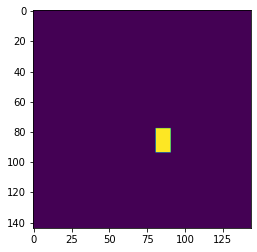

taille mask :  (144, 144, 234, 21)


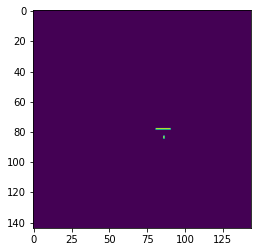

In [5]:
import matplotlib.pyplot as plt 

mip_directory = '/media/salim/DD 2To/AHL2011_MIP_FLIP' 


serie_pt_objet = SeriesPT(serie[2])
study_uid = serie_pt_objet.get_series_details()['study']['StudyInstanceUID']
nifti_array = serie_pt_objet.get_numpy_array()
angle_filename = mip_projection(nifti_array, 0, mip_directory, study_uid, borne_max = 5.0)             #mip.png PET
#subliste.append(angle_filename)

size_matrix = serie_pt_objet.get_size_matrix()
mask_objet = MaskBuilder(os.path.join(csv_directory, serie[4]), size_matrix)
mask_4D = mask_objet.mask_array
number_roi = mask_4D.shape[3]
threshold = mask_objet.details_rois['SUVlo']
        #seuillage
flip_mask = mask_objet.flip_z(mask_4D)
print(flip_mask.shape)
plt.imshow(flip_mask[:,:,190,0])
plt.show()

flip_mask = threshold_mask(flip_mask, mask_objet.details_rois, nifti_array)

angle_filename = mip_projection_4D(flip_mask, 0, mip_directory, study_uid, number_roi, borne_max = 5.0)

plt.imshow(flip_mask[:,:,190,0])
plt.show()



In [16]:
len(mask_objet.details_rois[1]['list_points'])

5296

In [7]:
# A FAIRE AUSSI LES SERIES EN CORONAL (FLIP Z) 
mip_directory = '/media/salim/DD 2To/AHL2011_MIP_FLIP'



path_mip = []
for serie in list_coronal : 
    index = list_coronal.index(serie)
    print(index)
    subliste = []
    if serie[1] =='PT' :
        serie_pt_objet = SeriesPT(serie[0])
        study_uid = serie_pt_objet.get_series_details()['study']['StudyInstanceUID']
        nifti_array = serie_pt_objet.get_numpy_array()
        angle_filename = mip_projection(nifti_array, 0, mip_directory, study_uid, borne_max = 5.0)             #mip.png PET
        subliste.append(angle_filename)

        size_matrix = serie_pt_objet.get_size_matrix()
        mask_objet = MaskBuilder(os.path.join(csv_directory, serie[4]), size_matrix)
        mask_4D = mask_objet.mask_array
        print(mask_4D.shape)
        number_roi = mask_4D.shape[3]
        threshold = mask_objet.details_rois['SUVlo']
        #seuillage
        flip_mask = mask_objet.flip_z(mask_4D)
        print(flip_mask.shape)
        #mask_4D_flip = mask_objet.mask_array
        new_mask_4D_flip = threshold_mask(flip_mask, mask_objet.details_rois, nifti_array)
        angle_filename_mask = mip_projection_4D(new_mask_4D_flip, 0, mip_directory, study_uid, number_roi, borne_max = 5.0)
        #mip.png MASK
        subliste.append(angle_filename_mask)

        path_mip.append(subliste)

        




    else : 
        serie_pt_objet = SeriesPT(serie[2])
        study_uid = serie_pt_objet.get_series_details()['study']['StudyInstanceUID']
        nifti_array = serie_pt_objet.get_numpy_array()
        angle_filename = mip_projection(nifti_array, 0, mip_directory, study_uid, borne_max = 5.0) 
        #mip.png PET
        subliste.append(angle_filename)
        size_matrix = serie_pt_objet.get_size_matrix()
        mask_objet = MaskBuilder(os.path.join(csv_directory, serie[4]), size_matrix)
        print(mask_objet.details_rois[1]['list_points'][0])
        mask_4D = mask_objet.mask_array
        print(mask_4D.shape)
        number_roi = mask_4D.shape[3]
        threshold = mask_objet.details_rois['SUVlo']
        #seuillage

        flip_mask = mask_objet.flip_z(mask_4D)
        print(mask_objet.details_rois[1]['list_points'][0])
        print(flip_mask.shape)
        #mask_4D_flip = mask_objet.mask_array
        new_mask_4D_flip = threshold_mask(flip_mask, mask_objet.details_rois, nifti_array)
        angle_filename_mask = mip_projection_4D(new_mask_4D_flip, 0, mip_directory, study_uid, number_roi, borne_max = 5.0)
        #mip.png MASK
        subliste.append(angle_filename_mask)

        path_mip.append(subliste)


0
[79, 79, 56]
(144, 144, 234, 21)
[79, 79, 177]
(144, 144, 234, 21)
taille mask :  (144, 144, 234, 21)
1
(144, 144, 234, 30)
(144, 144, 234, 30)
taille mask :  (144, 144, 234, 30)


KeyboardInterrupt: 

In [5]:
mip_directory = '/media/salim/DD 2To/AHL2011_MIP_FLIP'
filename = os.path.join(mip_directory, 'list_mip_coronal.pdf')
create_pdf_mip(path_mip, filename)

In [ ]:
#ALGO GENERATION DE CT PET MASK NIFTI SI MASK VALIDE

In [31]:
test = false_mask[0]
print(test)
false_mask.remove(test)

['/media/salim/DD 2To/AHL2011_Validated_DICOMS/13011105341002/1.2.250.1.31.1.0.0.0.40.9.4.0.20120531.94524.97.2.15815/1.2.840.113619.2.55.3.2831211778.248.1338437480.832.4/1.2.840.113619.2.55.3.2831211778.248.1338437480.832.4', 'CT', '/media/salim/DD 2To/AHL2011_Validated_DICOMS/13011105341002/1.2.250.1.31.1.0.0.0.40.9.4.0.20120531.94524.97.2.15815/1.2.840.113619.2.131.2831211778.1338463827.600267/1.2.840.113619.2.131.2831211778.1338463827.600267', 'PT', 'ham_fr_may 31_2012.csv']


In [32]:
print(len(false_mask))

94


In [33]:
for serie in false_mask : 
    print(false_mask.index(serie))
    try : 
        if serie[1] == 'PT' : 
            serie_pt_objet = SeriesPT(serie[0]) 
            nifti_array = serie_pt_objet.get_numpy_array()
            study_uid = serie_pt_objet.get_series_details()['study']['StudyInstanceUID']
            size_matrix = serie_pt_objet.get_size_matrix()
            mask_objet = MaskBuilder(os.path.join(csv_directory, serie[4]), size_matrix)
            mask_4D = mask_objet.mask_array

                    #si erreur sur les sd et mean QUE sur les ellipses, on tolère 
            print("MASK CORRECT")
                    #generation nifti PT
            filename_pt = study_uid+'_'+'nifti_'+'PT'+'.nii'
            serie_pt_objet.export_nifti(os.path.join(nifti_directory, filename_pt))
            print("EXPORT NIFTI PT")
                    #generation nifti CT
            serie_ct_objet = SeriesCT(serie[2])
            serie_ct_objet.get_numpy_array()
            filename_ct = study_uid+'_'+'nifti_'+'CT'+'.nii'
            serie_ct_objet.export_nifti(os.path.join(nifti_directory, filename_ct))
            print("EXPORT NIFTI CT")
                    #generation nifti mask
            filename_mask = study_uid+'_'+'nifti_'+'mask'+'.nii'
            serie_pt_objet.export_nifti(os.path.join(nifti_directory, filename_mask), mask_4D)
            print("EXPORT NIFTI MASK")


        else : 
            serie_pt_objet = SeriesPT(serie[2]) 
            nifti_array = serie_pt_objet.get_numpy_array()
            study_uid = serie_pt_objet.get_series_details()['study']['StudyInstanceUID']
            size_matrix = serie_pt_objet.get_size_matrix()
            mask_objet = MaskBuilder(os.path.join(csv_directory, serie[4]), size_matrix)
            mask_4D = mask_objet.mask_array
            print("MASK CORRECT")
                    #generation nifti PT
            filename_pt = study_uid+'_'+'nifti_'+'PT'+'.nii'
            serie_pt_objet.export_nifti(os.path.join(nifti_directory, filename_pt))
            print("EXPORT NIFTI PT")
                    #generation nifti CT
            serie_ct_objet = SeriesCT(serie[0])
            serie_ct_objet.get_numpy_array()
            filename_ct = study_uid+'_'+'nifti_'+'CT'+'.nii'
            serie_ct_objet.export_nifti(os.path.join(nifti_directory, filename_ct))
            print("EXPORT NIFTI CT")
                    #generation nifti mask
            filename_mask = study_uid+'_'+'nifti_'+'mask'+'.nii'
            serie_pt_objet.export_nifti(os.path.join(nifti_directory, filename_mask), mask_4D)
            print("EXPORT NIFTI MASK")
 

    except Exception as err : 
        print(serie)
        print(err)

0
MASK CORRECT
EXPORT NIFTI PT
EXPORT NIFTI CT
EXPORT NIFTI MASK
1
MASK CORRECT
EXPORT NIFTI PT
EXPORT NIFTI CT
EXPORT NIFTI MASK
2
MASK CORRECT
EXPORT NIFTI PT
EXPORT NIFTI CT
EXPORT NIFTI MASK
3
MASK CORRECT
EXPORT NIFTI PT
EXPORT NIFTI CT
EXPORT NIFTI MASK
4
MASK CORRECT
EXPORT NIFTI PT
EXPORT NIFTI CT
EXPORT NIFTI MASK
5
MASK CORRECT
EXPORT NIFTI PT
EXPORT NIFTI CT
EXPORT NIFTI MASK
6
MASK CORRECT
EXPORT NIFTI PT
EXPORT NIFTI CT
EXPORT NIFTI MASK
7
MASK CORRECT
EXPORT NIFTI PT
EXPORT NIFTI CT
EXPORT NIFTI MASK
8
MASK CORRECT
EXPORT NIFTI PT
EXPORT NIFTI CT
EXPORT NIFTI MASK
9
MASK CORRECT
EXPORT NIFTI PT
EXPORT NIFTI CT
EXPORT NIFTI MASK
10
MASK CORRECT
EXPORT NIFTI PT
EXPORT NIFTI CT
EXPORT NIFTI MASK
11
MASK CORRECT
EXPORT NIFTI PT
EXPORT NIFTI CT
EXPORT NIFTI MASK
12
MASK CORRECT
EXPORT NIFTI PT
EXPORT NIFTI CT
EXPORT NIFTI MASK
13
MASK CORRECT
EXPORT NIFTI PT
EXPORT NIFTI CT
EXPORT NIFTI MASK
14
MASK CORRECT
EXPORT NIFTI PT
EXPORT NIFTI CT
EXPORT NIFTI MASK
15
MASK CORRECT
EXPO

In [1]:
test_directory = '/media/salim/DD 2To/AHL2011_TEST'

In [ ]:
#GE false_mask[0]
#siemens false_mask[10]
#philips false_mask[80]